In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
path="D:\Machine Learning_Tasks\\Housing_dataset.csv"

In [97]:
df=pd.read_csv(path)

In [98]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [99]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [100]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [101]:
df.isna().sum().sum()

0

In [102]:
X = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y = df['median_house_value']

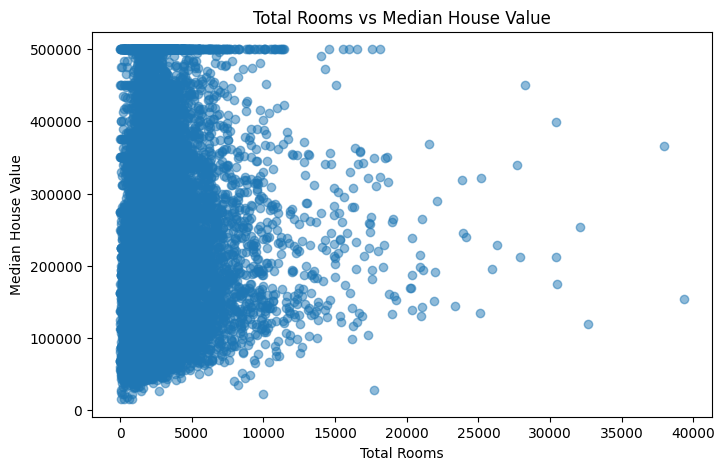

In [103]:
plt.figure(figsize=(8,5))
plt.scatter(X['total_rooms'], y , alpha=0.5)
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.title('Total Rooms vs Median House Value')
plt.show()

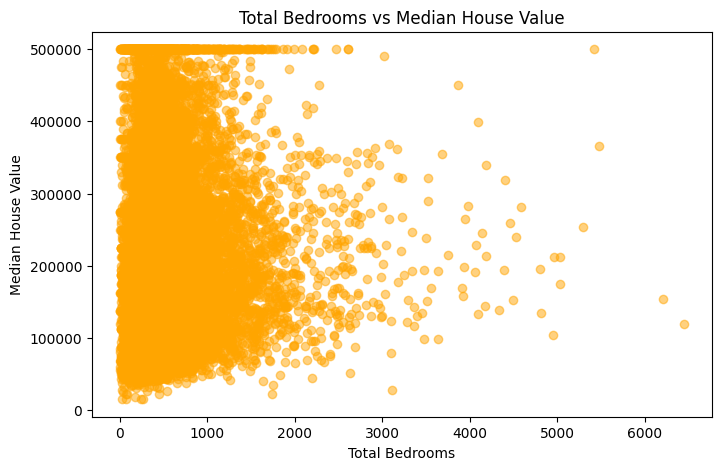

In [104]:
plt.figure(figsize=(8,5))
plt.scatter(X['total_bedrooms'], y, alpha=0.5, color='orange')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')
plt.title('Total Bedrooms vs Median House Value')
plt.show()


In [105]:
from scipy.stats import zscore
# Only apply Z-score on the selected columns
subset = X[['total_rooms','total_bedrooms','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
# Calculate Z-scores
z_scores = np.abs(zscore(subset))
threshold = 3

filter = (z_scores < threshold).all(axis=1)

# Apply filter to full X and y
X_clean = X[filter]
y_clean = y[filter]

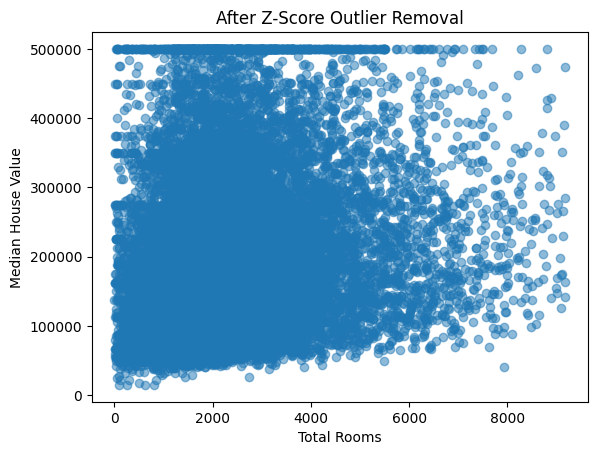

In [106]:
plt.scatter(X_clean['total_rooms'], y_clean, alpha=0.5)
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.title('After Z-Score Outlier Removal')
plt.show()

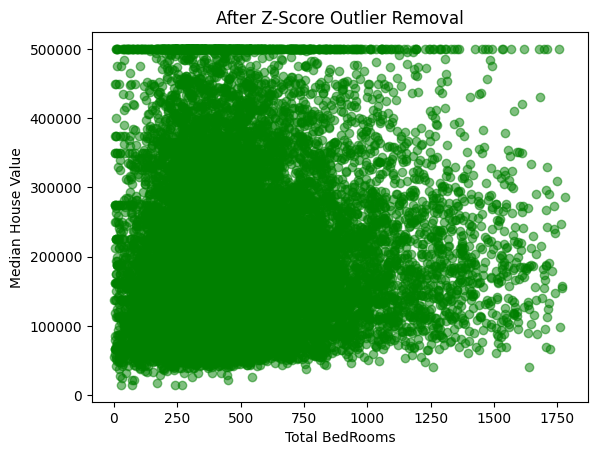

In [107]:
plt.scatter(X_clean['total_bedrooms'], y_clean, alpha=0.5,color='green')
plt.xlabel('Total BedRooms')
plt.ylabel('Median House Value')
plt.title('After Z-Score Outlier Removal')
plt.show()

In [108]:
X_final = X_clean[['longitude', 'latitude', 'total_rooms', 'total_bedrooms','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y_final = np.log1p(y_clean)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=lr.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R² Score: 0.6682175397251466
MAE: 0.24633042661311605
MSE: 0.10459142967066212
RMSE: 0.32340598273789267


##  1. Actual vs Predicted Plot

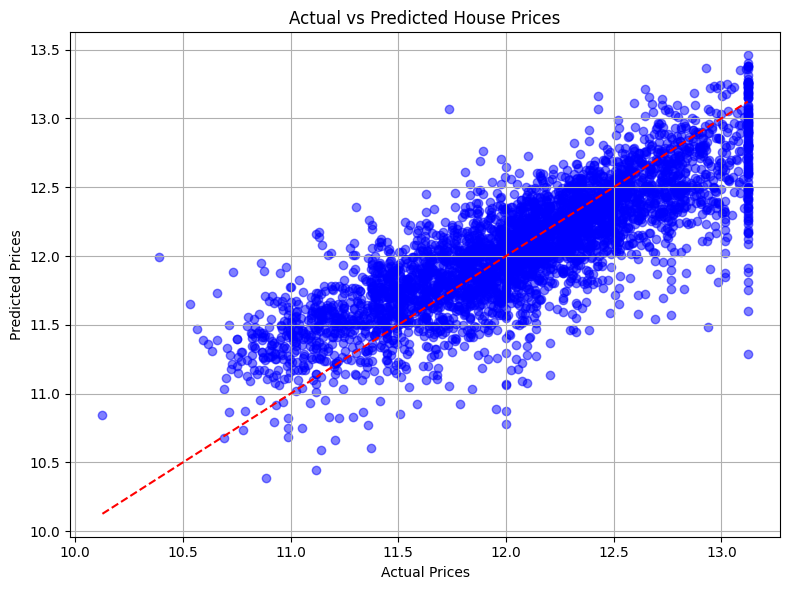

In [113]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = lr.predict(X_test_scaled)
y_true = y_test

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\sohai\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


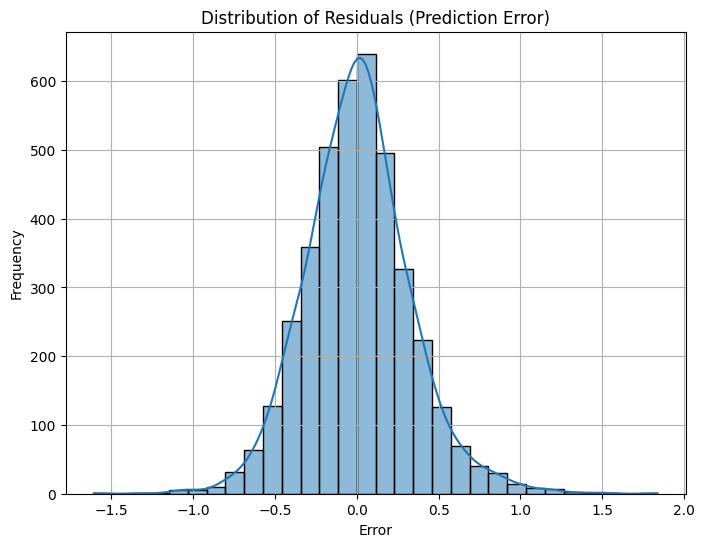

In [114]:
residuals = y_true - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals (Prediction Error)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

✅ Step-by-Step for Custom Prediction
🧩 1. Create your new input
Make sure it has the same features as your training set, including dummy columns (from one-hot encoding).

In [115]:
# Example custom input (as a dictionary)
new_data = {
    'longitude': -118.3,
    'latitude': 34.2,
    'total_rooms': 2000,
    'total_bedrooms': 400,
}